# Meningkatkan Kemungkinan Lagu Baru dari Sebuah Artis Menjadi Populer dan Trending Berdasarkan Spotify Dataset Menggunakan Model Supervised Learning


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler
uniform_data = np.random.rand(10, 12)
data = pd.DataFrame({'x':np.arange(1,101),'y':np.random.normal(0,4,100)})

##**Business Understanding**

### Business Objective

Tujuan utama analisis pada dataset ini adalah meningkatkan popularitas dan potensi lagu-lagu baru yang akan dirilis oleh musisi. Analisis dilakukan dengan merujuk pada popularitas lagu-lagu yang telah ada di platform Spotify, dengan mempertimbangkan berbagai faktor penilaian yang telah ditentukan untuk setiap lagu. Dengan memahami karakteristik dan tren dari lagu-lagu yang sukses dan populer, kita dapat mengembangkan strategi yang lebih terarah untuk mengoptimalkan potensi keberhasilan lagu-lagu baru di pasar musik yang kompetitif.

### Assess Situation

Analisis ini didasari oleh dorongan untuk memperluas popularitas seorang artis musik melalui penilaian mendalam terhadap lagu-lagu yang akan dirilis. Pendekatan ini didasarkan pada kebutuhan mendalam untuk memahami selera dan harapan pendengar, dengan harapan dapat menciptakan karya yang tidak hanya memenuhi ekspektasi pendengar, tetapi juga meraih daya tarik luas. Dengan menganalisis kebutuhan pendengar secara cermat, kita dapat merancang strategi yang lebih terfokus untuk meningkatkan daya tarik setiap rilisan musik yang akan datang.

### Data Mining Goals

Tujuan dari analisis data ini adalah untuk menentukan pola-pola dari setiap lagu berdasarkan faktor-faktor yang mempengaruhi sebuah lagu yang populer dan trending di platform Spotify seperti durasi, tempo, dan lain-lain. Selanjutnya, rancangan kesuksesan lagu akan dibangun, memberikan pandangan yang dapat membantu dalam mengidentifikasi kesuksesan yang mungkin dapat diadaptasi sebagai strategi pembuatan dan pemasaran lagu-lagu baru di platform Spotify. Dengan demikian, analisis data ini diharapkan dapat memberikan wawasan yang mendalam dan bermanfaat untuk mendukung pengambilan keputusan terkait strategi musik khususnya di platform Spotify.

### Project Plan

Proyek ini diawali dengan tahap pengumpulan data dari sumber yang tersedia, yang melibatkan penggalian dataset yang relevan. Setelah itu, karakteristik dataset akan dijelaskan dengan mengidentifikasi variabel kunci terkait karakteristik lagu dan popularitas. Selanjutnya, kita akan melihat data lebih detail untuk mengidentifikasi pola-pola dan tren yang ada. Setelah itu, fokus akan beralih ke tahap preprocessing dan penilaian kualitas data dan analisis lebih lanjut akan dilakukan untuk mengidentifikasi korelasi dan hubungan antara fitur-fitur lagu dan popularitasnya. Pada tahap inti, model prediktif akan dikembangkan untuk memprediksi popularitas lagu, kemudian hasil dari model yang telah diimplementasikan akan digunakan untuk merumuskan rekomendasi dan mengembangkan strategi yang dapat meningkatkan popularitas lagu.

##**Data Understanding**

### Collect Initial Data

Dataset ini diambil dari Kaggle dengan username @MAHARSHIPANDYA. Dataset Spotify ini menyajikan kumpulan lagu dari berbagai genre musik sebanyak 125 jenis yang berbeda, memberikan pemandangan musik yang kaya dan beragam untuk dianalisis. Setiap data dalam dataset ini merepresentasikan satu lagu dan dilengkapi dengan serangkaian fitur audio yang mencakup berbagai aspek musik. Informasi tentang dataset ini dapat diakses pada link berikut: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

In [2]:
df_file = pd.read_csv("dataset.csv")
df_file.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Describe Data

#### Informasi Dasar

In [3]:
jumlah_baris, jumlah_kolom = df_file.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 114000
Jumlah Kolom: 21


Dataset ini memiliki jumlah baris sebanyak 114000 yang berarti dataset ini menyimpan sebanyak 114000 data dan masing-masing data memiliki 21 kolom.

#### Informasi Lanjutan

In [4]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

*Deskripsi Column*
1. track_id : Merupakan ID Spotify untuk tiap track lagu. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
2. artists : Merupakan nama dari artis yang menyanyikan lagu tersebut, jika terdapat lebih dari dua artis yang menyanyikan lagu tersebut maka dipisahkan dengan tanda ";". Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
3. album_name : Merupakan nama album dimana lagu tersebut berada. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
4. track_name : Merupakan nama track/lagu tersebut. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
5. popularity : Merupakan kolom yang menilai  seberapa populer lagu tersebut dari 0 hingga 100, dengan 100 yang berarti lagu tersebut paling populer. Kepopularitasan lagu ini dinilai berdasarkan jumlah berapa kali lagu tersebut diputar dan seberapa kini putaran dari lagu tersebut dilakukan. Popularitas artis dan album diperoleh secara matematis dari popularitas lagu. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
6. duration_ms : Merupakan durasi lagu dalam milisecond. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
7. explicit : Merupakan penilaian apakah lirik dalam lagu tersebut berisi kata kasar atau tidak. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data booelan.
8. danceability : Merupakan penilaian seberapa menarik lagu tersebut untuk digunakan menari. Hal ini dinilai dari beberapa elemen musik seperti tempo, kestabilan ritme, kekuatan irama, dan keteraturan secara keseluruhan. Isi dari nilainya mulai dari 0.0 hingga 1.0. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
9. energy : Merupakan penilaian dari 0.0 hingga 1.0 berdasarkan intensitas dan aktivitas dari lagu tersebut. Biasanya lagu berenergi terasa lebih cepat, keras, dan berisik. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
10. key : Merupakan kunci dari lagu tersebut. Angka-angka ini menggambarkan nada menggunakan notasi Pitch Class standar. Contohnya, 0 = C, 1 = C♯/D♭, 2 = D, dan seterusnya. Jika tidak ada kunci yang terdeteksi, nilai yang digunakan adalah -1. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
11. loudness : Merupakan kenyaringan lagu secara keseluruhan dalam desibel (dB). Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
12. mode : Merupakan indikasi modalitas (Mayor atau Minor) dari sebuah lagu, jenis skala dari mana konten melodiannya berasal. Mayor direpresentasikan oleh 1 dan Minor oleh 0. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
13. speechiness : Speechiness mendeteksi keberadaan kata-kata yang diucapkan dalam sebuah lagu. Semakin eksklusif rekaman terdengar seperti pidato (misalnya, talk show, audio book, puisi), semakin mendekati nilai atribut 1.0. Nilai di atas 0.66 menggambarkan lagu yang mungkin sepenuhnya terdiri dari kata-kata yang diucapkan. Nilai antara 0.33 dan 0.66 menggambarkan lagu yang mungkin mengandung baik musik maupun ucapan, entah dalam bagian-bagian tertentu atau terlapis, termasuk kasus seperti musik rap. Nilai di bawah 0.33 kemungkinan besar mencerminkan musik dan lagu-lagu lain yang tidak mirip ucapan. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
14. acousticness : Sebuah ukuran kepercayaan dari 0.0 hingga 1.0 mengenai apakah lagu tersebut bersifat akustik. Angka 1.0 mencerminkan tingkat kepercayaan yang tinggi bahwa lagu tersebut bersifat akustik. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
15. instrumentalness : Memprediksi apakah sebuah lagu tidak mengandung vokal. Suara "ooh" dan "aah" dianggap sebagai instrumental dalam konteks ini. Lagu rap atau yang berisi kata-kata yang diucapkan dengan jelas dianggap "vokal". Semakin mendekati nilai instrumentalness 1.0, semakin besar kemungkinan lagu tersebut tidak mengandung konten vokal. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
16. liveness : Mendeteksi kehadiran penonton dalam rekaman. Nilai kehadiran yang tinggi mengindikasikan kemungkinan besar bahwa lagu tersebut dipentaskan secara langsung. Nilai di atas 0,8 memberikan kemungkinan besar bahwa lagu tersebut adalah rekaman live. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
17. valence : Sebuah ukuran dari 0.0 hingga 1.0 yang menggambarkan kepositifan musikal yang disampaikan oleh sebuah lagu. Lagu-lagu dengan valensi tinggi terdengar lebih positif (misalnya, ceria, bahagia, euforia), sementara lagu-lagu dengan valensi rendah terdengar lebih negatif (misalnya, sedih, tertekan, marah). Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
18. tempo : Kecepatan tempo secara keseluruhan dari sebuah lagu diukur dalam ketukan per menit (BPM). Dalam istilah musik, tempo adalah kecepatan atau laju suatu karya musik dan langsung berasal dari durasi rata-rata setiap ketukan. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
19. time_signature : Suatu tanda waktu yang diperkirakan. Tanda waktu (meter) merupakan konvensi notasi untuk menentukan berapa banyak ketukan yang ada dalam setiap bilah (atau ukuran). Tanda waktu bervariasi mulai dari 3 hingga 7, yang menunjukkan tanda waktu seperti 3/4 hingga 7/4. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
20. track_genre : Merupakan genre dari lagu tersebut. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.







#### Informasi Statistik Deskriptif

In [5]:
df_file.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


1. popularity :
- count = 114000
- mean = 33.238535
- std = 22.305078
- min = 0
- 25% = 17
- 50% = 35
- 75% = 50
- max = 100
2. duration_ms:
- count = 1.140000e+05
- mean = 2.280292e+05
- std = 1.072977e+05
- min = 0
- 25% = 1.740660e+05
- 50% = 2.129060e+05
- 75% = 2.615060e+05
- max = 5.237295e+06
3. danceability:
- count = 114000
- mean = 0.566800
- std = 0.173542
- min = 0
- 25% = 0.456000
- 50% = 0.580000
- 75% = 0.695000
- max = 0.985000
4. energy:
- count = 114000
- mean = 0.641383
- std = 0.251529
- min = 0
- 25% = 0.472000
- 50% = 0.685000
- 75% = 0.854000
- max = 1
5. key:
- count = 114000
- mean = 5.309140
- std = 3.559987
- min = 0
- 25% = 2
- 50% = 5
- 75% = 8
- max = 11
6. loudness:
- count = 114000
- mean = -8.258960
- std = 5.029337
- min = -49.531000
- 25% = -10.013000
- 50% = -7.004000
- 75% = -5.003000
- max = 4.532000
7. mode:
- count = 114000
- mean = 0.637553
- std = 0.480709
- min = 0
- 25% = 0
- 50% = 1
- 75% = 1
- max = 1
8. speechiness:
- count = 114000
- mean = 0.084652
- std = 0.105732
- min = 0
- 25% = 0.035900
- 50% = 0.048900
- 75% = 0.084500
- max = 0.965000
9. acousticness:
- count = 114000
- mean = 0.314910
- std = 0.332523
- min = 0
- 25% = 0.016900
- 50% = 0.169000
- 75% = 0.598000
- max = 0.996000
10. instrumentalness:
- count = 114000
- mean = 0.156050
- std = 0.309555
- min = 0
- 25% = 0
- 50% = 0.000042
- 75% = 0.049000
- max = 1
11. liveness:
- count = 114000
- mean = 0.213553
- std = 0.190378
- min = 0
- 25% = 0.098000
- 50% = 0.132000
- 75% = 0.273000
- max = 1
12. valence:
- count = 114000
- mean = 0.474068
- std = 0.259261
- min = 0
- 25% = 0.260000
- 50% = 0.464000
- 75% = 0.683000
- max = 0.995000
13. tempo:
- count = 114000
- mean = 122.147837
- std = 29.978197
- min = 0
- 25% = 99.218750
- 50% = 122.017000
- 75% = 140.071000
- max = 243.372000
14. time_signature:
- count = 114000
- mean = 3.904035
- std = 0.432621
- min = 0
- 25% = 4
- 50% = 4
- 75% = 4
- max = 5

### Exploratory Data Analysis

<ipython-input-6-e79115483196>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='popularity', y='track_genre', data=df_file, ci=None,


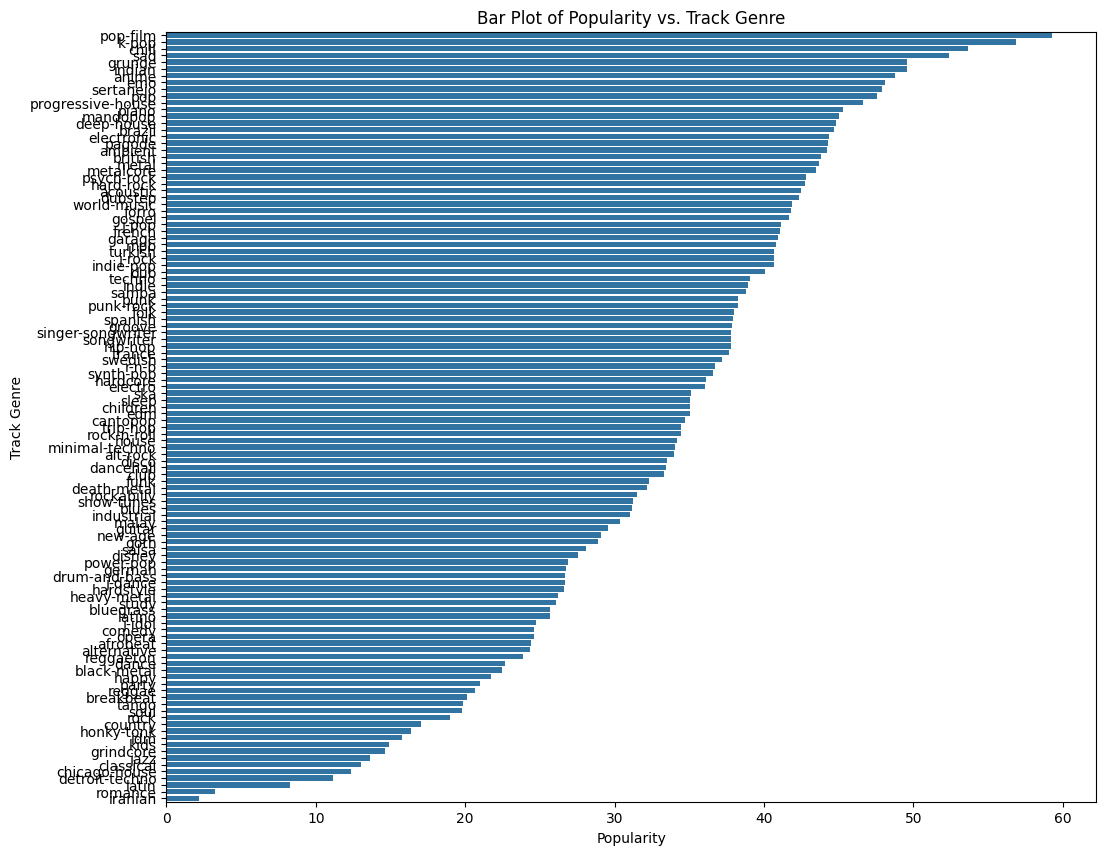

In [6]:
# sampledata = df_file.sample(n=100)

# Create the bar plot without error bars and in descending order
plt.figure(figsize=(12, 10))
sns.barplot(x='popularity', y='track_genre', data=df_file, ci=None,
            order=df_file.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).index)

# Set labels and title
plt.xlabel('Popularity')
plt.ylabel('Track Genre')
plt.title('Bar Plot of Popularity vs. Track Genre')

# Show the plot
plt.show()

Pada plot ini ada empat genre yang memiliki popularitas yang tinggi, yaitu chill, grunge, anime, dan emo. Empat genre ini akan kita gunakan nantinya untuk melihat korelasinya dengan variabel kolom-kolom penilaian yang lain. Kemudian pada plot ini juga dapat kita lihat bahwa genre classical, chicago-house, dan detroit techno memiliki tingkat popularitas yang rendah. Dengan hasil plot ini kita dapat memilih genre mana yang dapat meningkatkan kemungkinan dari popularitas musik nanti dan menghindari genre yang memiliki tingkat popularitas yang rendah.

<ipython-input-7-d663056e82c5>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='track_genre', y='danceability', data=filtered_data, ci=None)


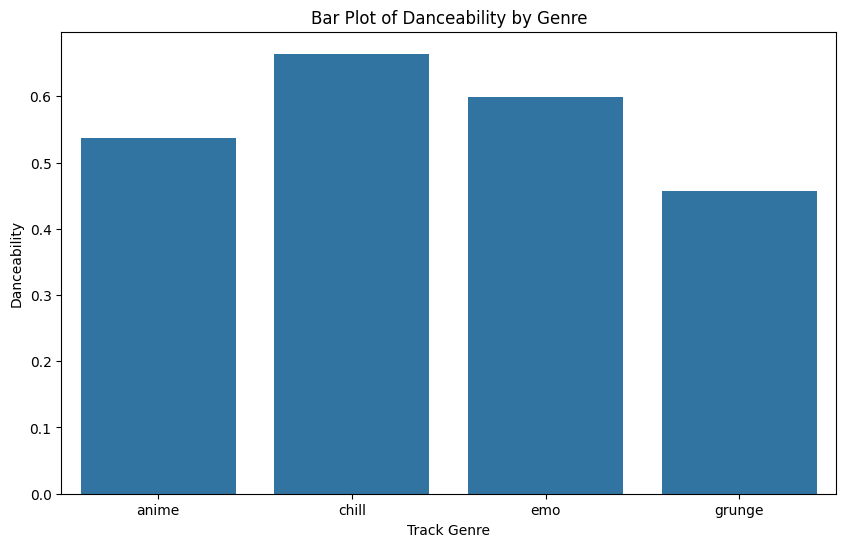

In [7]:
# sampledata = df_file.sample(n=100)

# Select the specific genres you are interested in
selected_genres = ["chill", "grunge", "anime", "emo"]
filtered_data = df_file[df_file['track_genre'].isin(selected_genres)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='danceability', data=filtered_data, ci=None)

# Set labels and title
plt.xlabel('Track Genre')
plt.ylabel('Danceability')
plt.title('Bar Plot of Danceability by Genre')

# Show the plot
plt.show()


Pada plot ini kita menggunakan empat genre yang memiliki  tingkat popularitas yang tinggi yang dapat kita lihat pada plot sebelumnya, genre chill memiliki nilai danceability tertinggi, diikuti oleh emo. Genre anime juga relatif cocok untuk berdansa, sedangkan genre grunge memiliki nilai danceability terendah. Pada empat top genre yang populer ini nilai danceability berkisar antara >0.4 hingga <0.7, dengan ini kita asumsikan bahwa untuk meningkatkan popularitas pada musik yang akan kita hasilkan nilai danceability harus ada pada kisaran angka tersebut.

<ipython-input-8-22b74df14c6f>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='track_genre', y='energy', data=filtered_data, ci=None)


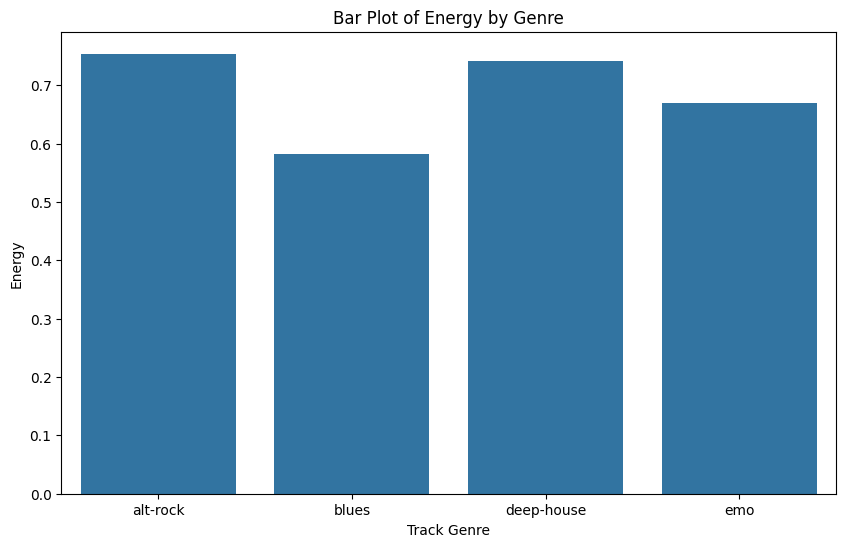

In [8]:
# sampledata = df_file.sample(n=100)

# Select the specific genres you are interested in
selected_genres = ["alt-rock", "blues", "deep-house", "emo"]
filtered_data = df_file[df_file['track_genre'].isin(selected_genres)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='energy', data=filtered_data, ci=None)

# Set labels and title
plt.xlabel('Track Genre')
plt.ylabel('Energy')
plt.title('Bar Plot of Energy by Genre')

# Show the plot
plt.show()

Pada plot ini, genre yang memiliki tingkat kepopularitasan yang tinggi memiliki nilai energy yang berkisar antara >0.5 hingga <0.8. Dengan alt-rock yang memiliki tingkat energy yang tinggi diikuti dengan deep-house dan emo, sedangkan blues memiliki tingkat energy yang lebih rendah. Dengan ini dapat kita asumsikan bahwa untuk meningkatkan popularitas pada musik yang akan kita hasilkan nilai energy harus ada pada kisaran angka tersebut.

<ipython-input-9-7df87278b7f1>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='track_genre', y='valence', data=filtered_data, ci=None)


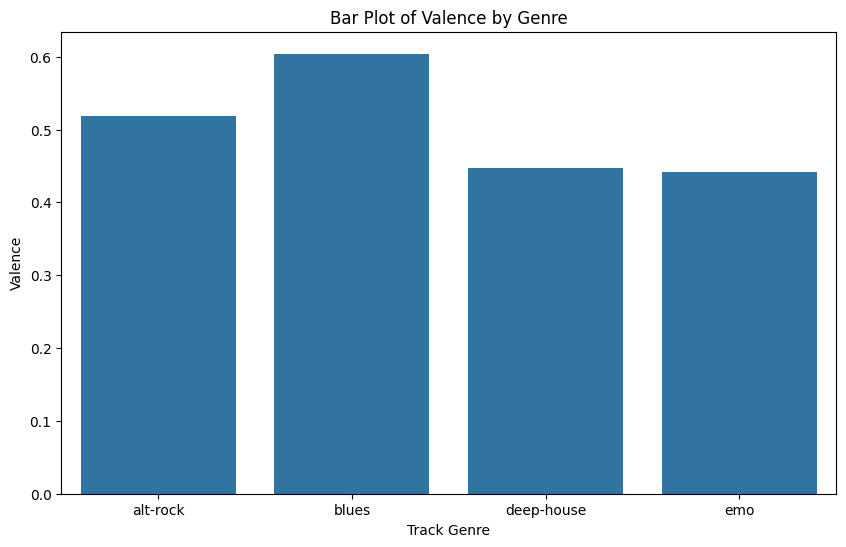

In [9]:
# sampledata = df_file.sample(n=100)

# Select the specific genres you are interested in
selected_genres = ["alt-rock", "blues", "deep-house", "emo"]
filtered_data = df_file[df_file['track_genre'].isin(selected_genres)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='valence', data=filtered_data, ci=None)

# Set labels and title
plt.xlabel('Track Genre')
plt.ylabel('Valence')
plt.title('Bar Plot of Valence by Genre')

# Show the plot
plt.show()

Pada plot ini dapat kita lihat bahwa genre yang memiliki tingkat popularitas yang tinggi memiliki nilai valence yang berkisar antara >0.4 hingga 0.6. Dapat diasumsikan bahwa untuk mencipatakan lagu yang populer nilai kepositifan sebuah lagu sebaiknya tidak terlalu positif dalam konteks cheerful dan juga tidak terlalu negatif dalam konteks sedih. Dengan blues yang memiliki nilai valence tertinggi diikuti dengan alt-rock, deep-house, dan emo. Dengan ini dapat kita asumsikan bahwa untuk meningkatkan popularitas pada musik yang akan kita hasilkan nilai valence harus ada pada kisaran angka tersebut.

### Verify Data Quality

#### Missing Values

In [10]:
missing_values = df_file.isnull().sum()

print(missing_values)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Dapat kita lihat di atas bahwa pada kolom artists, album_name, dan track_name terdapat satu missing values. Dan untuk kolom sisanya seperti track_id, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, dan track_genre tidak memiliki missing values pada kolomnya.

#### Outliers Value

In [11]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
popularity,0.001754
duration_ms,4.927193
danceability,0.543860
energy,0.000000
key,0.000000
loudness,5.414912
mode,0.000000
speechiness,11.588596
acousticness,0.000000


Setiap kolom yang ada pada hasil di atas memiliki jumlah outliers sebanyak 0 dan masing-masing juga memiliki persentase kehadiran outliers sebesar 0.00%

#### Duplicated Values

In [12]:
duplicate_values =(df_file.duplicated())

print("Apakah Ada Nilai Duplikat pada Tiap Kolom:")
print(duplicate_values)

Apakah Ada Nilai Duplikat pada Tiap Kolom:
0         False
1         False
2         False
3         False
4         False
          ...  
113995    False
113996    False
113997    False
113998    False
113999    False
Length: 114000, dtype: bool


Untuk hasil dari cek duplikasi dataset yang ada di atas dapat disimpulkan bahwa banyak data yang tidak ada data yang duplikat sehingga tidak berpengaruh terhadap statistik deskriptif yang berarti bisa menjadi bias dan tidak mencerminkan variasi sebenarnya didalam dataset.

##**Data Cleaning**

### Penanganan Missing Values

#### Pengecekan Missing Values

Ini adalah output dalam persentase, yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [13]:
print((df_file.isna().sum() / len(df_file)) * 100)

Unnamed: 0          0.000000
track_id            0.000000
artists             0.000877
album_name          0.000877
track_name          0.000877
popularity          0.000000
duration_ms         0.000000
explicit            0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
time_signature      0.000000
track_genre         0.000000
dtype: float64


Nilai kosong pada kolom artists

In [14]:
df_file[df_file['artists'].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Nilai kosong pada kolom album_name

In [15]:
df_file[df_file['album_name'].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Nilai kosong pada track_name

In [16]:
df_file[df_file['track_name'].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


#### Hapus Missing Values

In [17]:
df_file = df_file[df_file["track_id"] != "1kR4gIb7nGxHPI3D2ifs59"]

#### Imputasi Missing Values

Pada dataset ini imputasi tidak diperlukan sama sekali

#### Pengecekkan Ulang

In [18]:
pd.DataFrame(df_file.isna().sum() / len(df_file) * 100, columns=['Null Ratio %'])

,Null Ratio %
Unnamed: 0,0.0
track_id,0.0
artists,0.0
album_name,0.0
track_name,0.0
popularity,0.0
duration_ms,0.0
explicit,0.0
danceability,0.0
energy,0.0


Setelah dilakukan penghapusan pada missing values, setelah di cek kembali missing values pada semua kolom menjadi tidak ada

### Penanganan Duplicated Values

#### Pengecekkan Nilai Duplikat

In [19]:
df_file[df_file.duplicated()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


Pada data set ini tidak ada nilai yang memiliki duplikat pada semua kolomnya

#### Hapus Nilai Duplikat

Tidak ada yang perlu dihapus karna nilai duplikat tidak ada pada data set ini

### Penanganan Outliers

#### Pengecekkan Outliers

In [20]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
popularity,0.001754
duration_ms,4.926359
danceability,0.543864
energy,0.000000
key,0.000000
loudness,5.414960
mode,0.000000
speechiness,11.588698
acousticness,0.000000


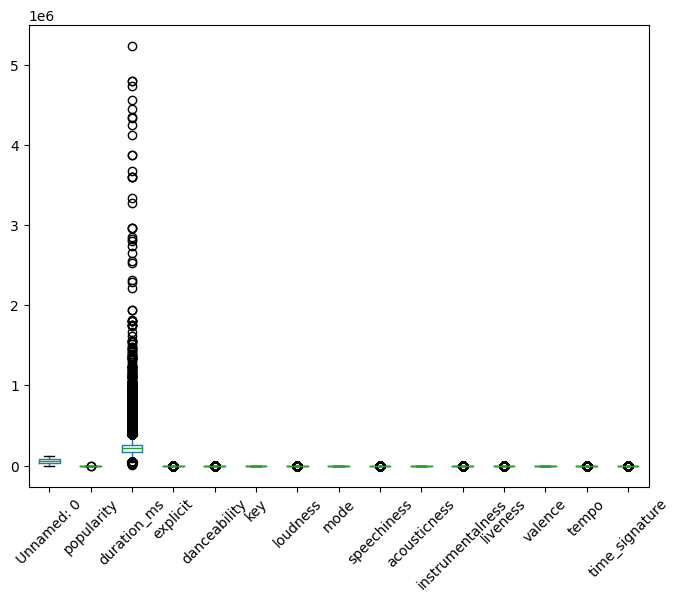

In [21]:
boxplot = df_file.drop('energy', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#### Hapus Outliers

Melakukan penghapusan baris pada kolom popularity untuk menangani outliers

In [22]:
Q1 = df_file['popularity'].quantile(0.25)
Q3 = df_file['popularity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['popularity'] >= lower_bound) & (df_file['popularity'] <= upper_bound)]

Melakukan penghapusan baris pada kolom duration_ms untuk menanganin outliers

In [23]:
Q1 = df_file['duration_ms'].quantile(0.25)
Q3 = df_file['duration_ms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['duration_ms'] >= lower_bound) & (df_file['duration_ms'] <= upper_bound)]

Melakukan penghapusan baris pada kolom danceability untuk menanganin outliers

In [24]:
Q1 = df_file['danceability'].quantile(0.25)
Q3 = df_file['danceability'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['danceability'] >= lower_bound) & (df_file['danceability'] <= upper_bound)]

Melakukan penghapusan baris pada kolom loudness untuk menanganin outliers

In [25]:
Q1 = df_file['loudness'].quantile(0.25)
Q3 = df_file['loudness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['loudness'] >= lower_bound) & (df_file['loudness'] <= upper_bound)]

Melakukan penghapusan baris pada kolom liveness untuk menanganin outliers

In [26]:
Q1 = df_file['liveness'].quantile(0.25)
Q3 = df_file['liveness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['liveness'] >= lower_bound) & (df_file['liveness'] <= upper_bound)]

Melakukan penghapusan baris pada kolom tempo untuk menanganin outliers

In [27]:
Q1 = df_file['tempo'].quantile(0.25)
Q3 = df_file['tempo'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['tempo'] >= lower_bound) & (df_file['tempo'] <= upper_bound)]

#### Pengecekkan Ulang

In [28]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
popularity,0.000000
duration_ms,1.688833
danceability,0.231159
energy,0.000000
key,0.000000
loudness,1.435508
mode,0.000000
speechiness,11.212793
acousticness,0.000000


Dapat dilihat persentase outliers pada setiap kolom yang memiliki nilai dibawah 10 semuanya sudah ditangani

### Construct Data

#### Melakukan Rekayasa Fitur (Feature Engineering)

In [29]:
min_tempo = df_file['tempo'].min()
max_tempo = df_file['tempo'].max()

# Menambahkan kolom "tempo_type" berdasarkan kriteria
df_file['tempo_type'] = pd.cut(df_file['tempo'], bins=[min_tempo - 1, 54, 116, float('inf')],
                          labels=['slow', 'moderate', 'fast'])


Pada rekayasa fitur di atas, kolom tempo_type ditambahkan untuk membagi jenis tempo menjadi tiga jenis yaitu, slow, moderate, dan fast.

#### Pengecekkan Hasil

In [30]:
df_file.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tempo_type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,moderate
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,moderate
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,fast
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,moderate
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,fast


### Data Reduction

#### Mengurangi Fitur-Fitur Yang Kurang Relevan

Pada dataset yang saya miliki semua kolom yang ada sangat relevan untuk dipakai dalam data mining goals saya.

#### Pengecekkan Hasil

In [31]:
df_corr = df_file.corr(numeric_only=True)
px.imshow(df_corr)

### Data Transformation

#### Mapping

In [32]:
df_file['tempo_type'] = df_file['tempo_type'].map({'slow':1,'moderate':2,'fast':3})

In [33]:
df_file.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tempo_type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,2
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,3


Pada mapping ini sayang mengubah values pada kolom "tempo_type" yang sebelumnya adalah slow, moderate, dan fast. Menjadi angka 1, 2, dan 3.

#### Pengecekkan Ulang

In [35]:
df_file.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tempo_type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,2
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,3


In [36]:
df_file.to_csv('DataCleaned.csv', index=False)